# Imported libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train cleaning

In [2]:
diamonds = pd.read_csv("data/train.csv")
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [3]:
#To ensure that the variable types doesn´t have surprises:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [4]:
#Let´s have a look at the null values
diamonds.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no Null values which are very good news

Some of the columns contain categorical data, but before using "get dummies" let´s see if we have too many categories.

In [5]:
# Cut 
diamonds["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [6]:
# Color
diamonds["color"].unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

In [7]:
# Clarity
diamonds["clarity"].unique()

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

Since the variables "Cut", "Color" and "Clarity" have between 5 and 8 categories, I'm going to turn them into binary variables using "get dummies" so I can use them to train the models and use them in a corrrelation matrix.

In [10]:
#get dummies
diam_dum = pd.get_dummies(diamonds, prefix=['cut', 'color','clarity'])

In [11]:
diam_dum.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.50,61.5,58.0,7.32,7.34,4.51,9.588,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2.01,60.6,59.0,8.11,8.25,4.96,9.748,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.50,61.6,57.0,5.13,5.09,3.15,7.255,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.25,61.6,57.0,4.05,4.08,2.50,6.450,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.52,62.0,55.0,5.16,5.19,3.21,7.721,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Correlation matrix only with original numeric variables

In [8]:
correlation_matrix = diamonds.corr()

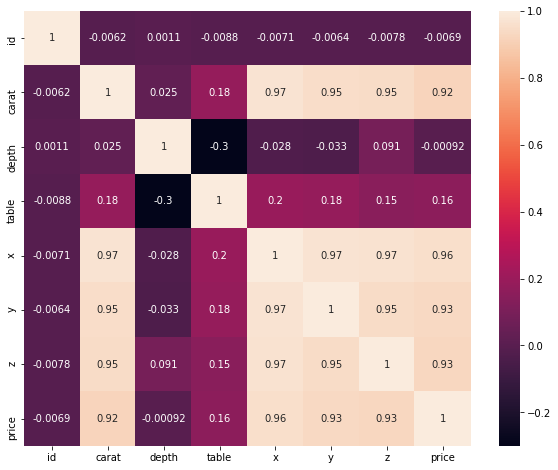

In [13]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

It looks like the variables that are less correlated with the price are depth and table. But this analysis cannot use the cathegoric variables so let's have a look at those too. 

In [21]:
# Correlation matrix with all the variables

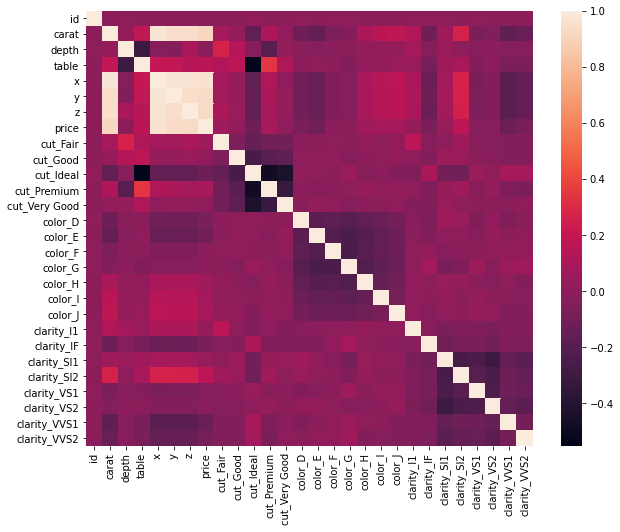

In [14]:
correlation_matrix = diam_dum.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False)
plt.show()

finally it looks that carat is highly correlated with the price, and so does x, y and z values.

In [15]:
diam_dum.to_csv(r'data\diamonds_dummies.csv', index=False)

# Test cleaning

We have to apply the same cleaning to the Test dataframe because if not when we try to apply the trained model, it will not work

In [16]:
diamonds_test = pd.read_csv("data/test.csv")
diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93


In [17]:
diamonds_test = pd.get_dummies(diamonds_test, prefix=['cut', 'color','clarity'])

In [19]:
diamonds_test.to_csv(r'test_dummies.csv', index=False)